# Data Description

In [130]:
# Importing requried libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV
import pickle
import warnings
warnings.filterwarnings('ignore')

# Step 1. Data Selection

In [21]:
# Loading the dataset

df=pd.read_csv ("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [35]:
df.head #showing entire datasets

<bound method NDFrame.head of                       Country                           Region  \
0                 Switzerland                   Western Europe   
1                     Iceland                   Western Europe   
2                     Denmark                   Western Europe   
3                      Norway                   Western Europe   
4                      Canada                    North America   
5                     Finland                   Western Europe   
6                 Netherlands                   Western Europe   
7                      Sweden                   Western Europe   
8                 New Zealand        Australia and New Zealand   
9                   Australia        Australia and New Zealand   
10                     Israel  Middle East and Northern Africa   
11                 Costa Rica      Latin America and Caribbean   
12                    Austria                   Western Europe   
13                     Mexico      Latin Ameri

In [139]:
df.head() #showing first five datasets

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [37]:
df.tail() #showing last 5 datasets

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [ ]:
# From above datasets, It is clear that Switzerland is world's happiest country (Ranked 1th) and Togo is least happiest country (Ranked 157th).
# Wester europe is happiest region, whereas sub-saharan africa is least happiest region.

In [29]:
df.shape # checking data dimension

(158, 12)

In [ ]:
# There are 158 rows and 12 columns

In [27]:
pd.set_option('display.max_rows',None)

In [ ]:
# pd.set_option('display.max_rows',None) - main purpose of using this is it will display all rows (if more than 10 rows) instead of first 5 and last 5.

In [30]:
df.info() #information about dataset like data type, Null values etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [33]:
df.dtypes #data type

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
# Country and Region has data set has object data type and rest of data set has float data type. There is no null value in dataset.

# Step 2. Data description

In [34]:
df.describe() #statistical summary

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
# Country and Region is object(string) dataset. So it is excluded in describe method. 
# Count showing how many data points are there. There is no missing value in it (158 data points). It also showing mean, std, min, max , 25%,50% and 75% data.
# Mean - median (50%) ==> helps to undrstand if there is outliers or not. There is no outliers as such because there is very less difference between mean and median part in every column.

In [ ]:
# Happiness score - It is based on sample from 2013 to 2015 based on rating 0 to 10.
# GDP per Capita - It divide country's gross domestic product by its population.
# Life expectancy - The average period that a person to live.
# Freedom - Freedom to make choices.

In [38]:
df.isnull().sum()  #Checking null values in dataset

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
# There is no null values in dataset.

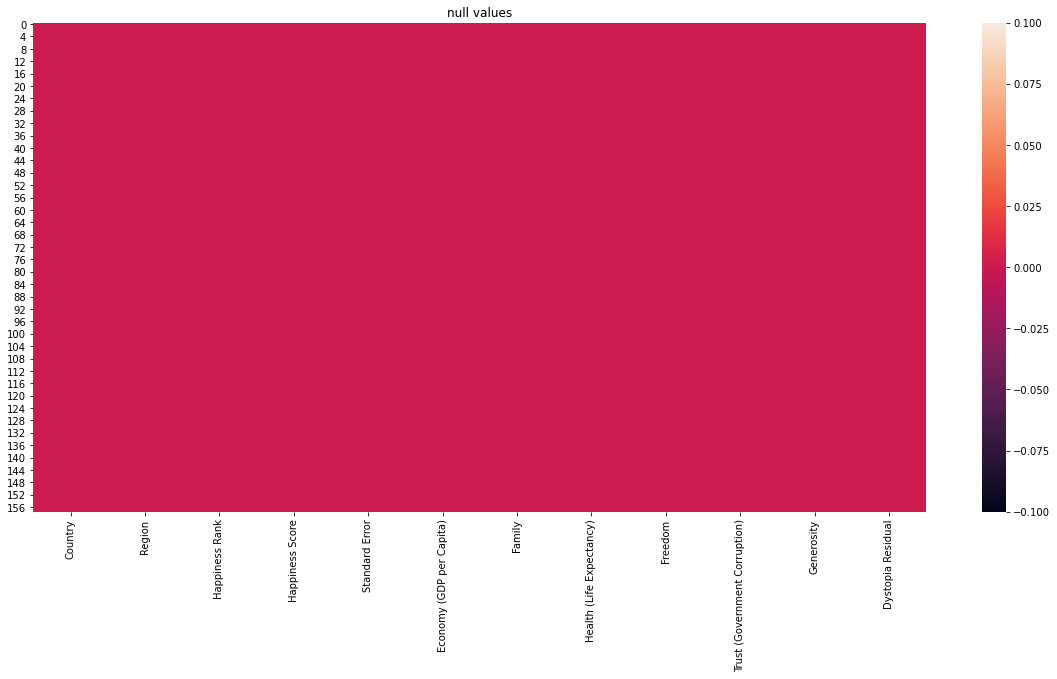

In [39]:
#visualization for null values

plt.figure(figsize=[20,9])
sns.heatmap(df.isnull())
plt.title('null values')
plt.show()

In [ ]:
# There is no blank (white) gap so it represts no null value present in dataset.

# Step 3. Data standarization and normalization

In [40]:
corr_mat = df.corr() #Checking for correlation. It is example of multi variant analysis.

In [41]:
corr_mat

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


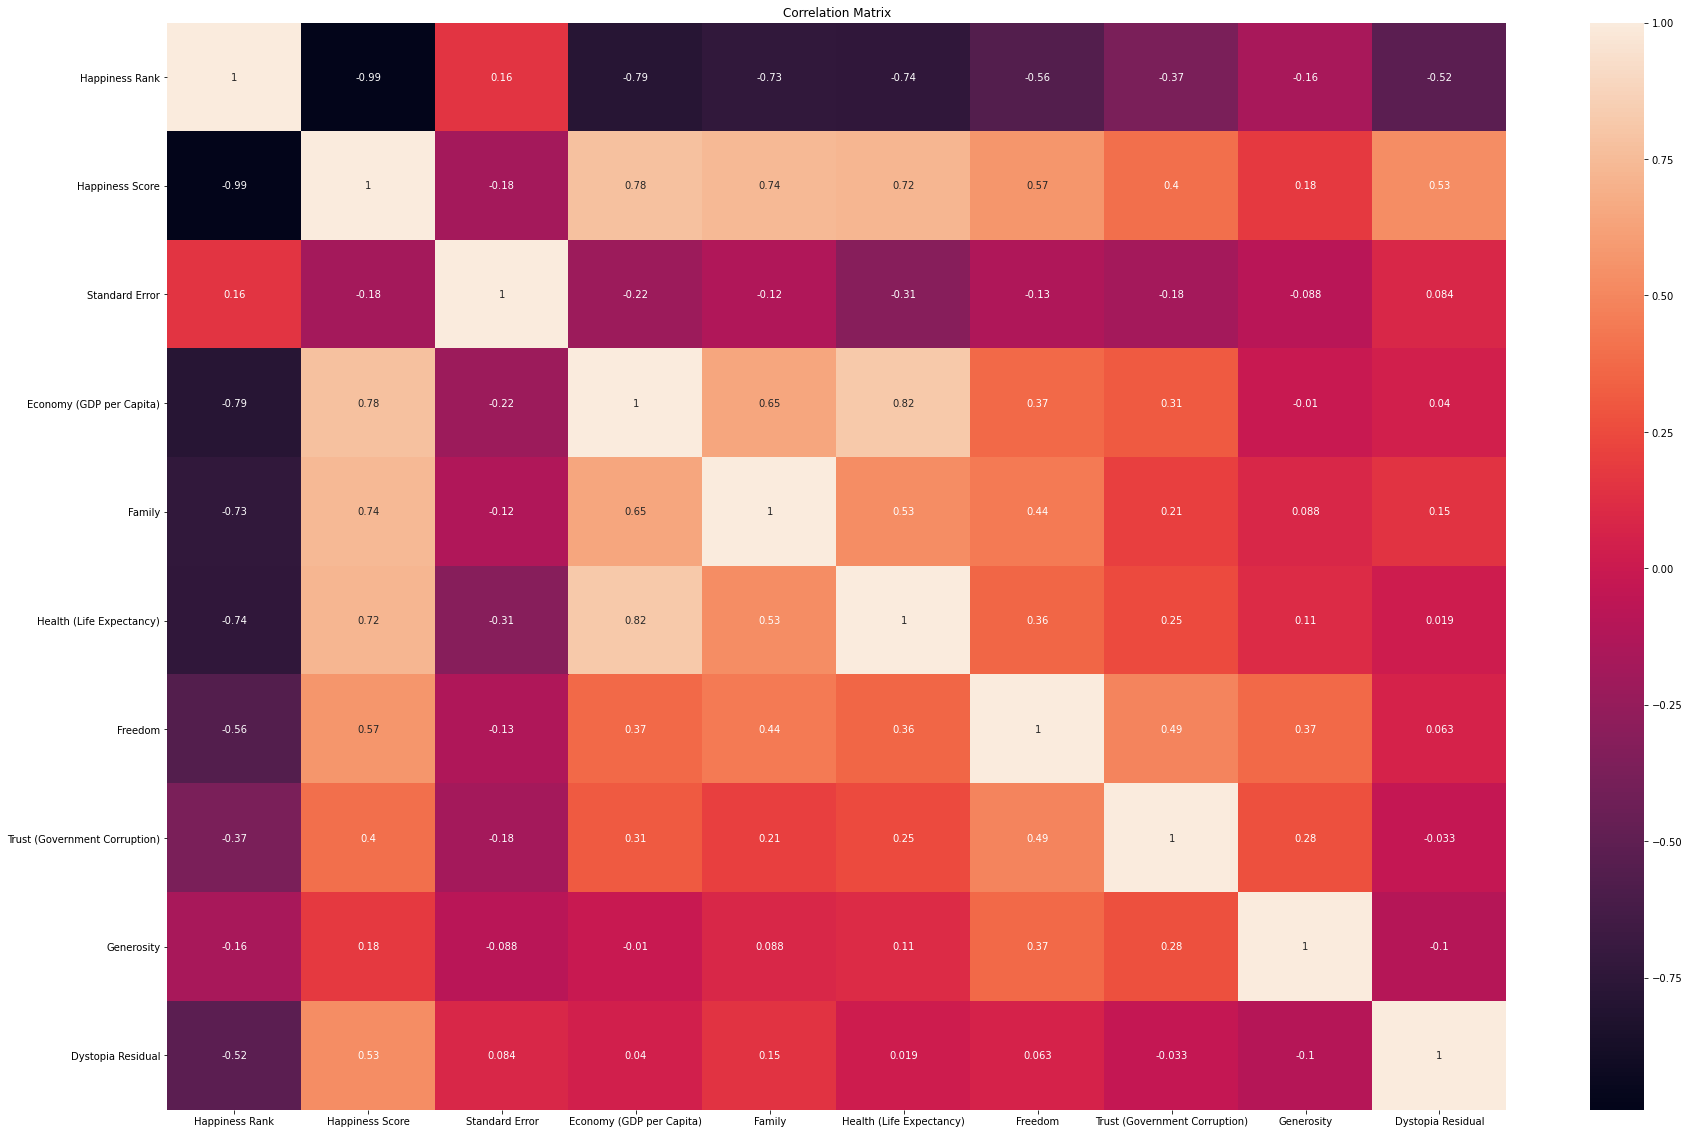

In [43]:
#visualization for coorelated values

plt.figure(figsize=[30,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# There is correlation between Happiness score, Economy (GDP per capita), Family and Health (Life expectancy).

In [52]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [53]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


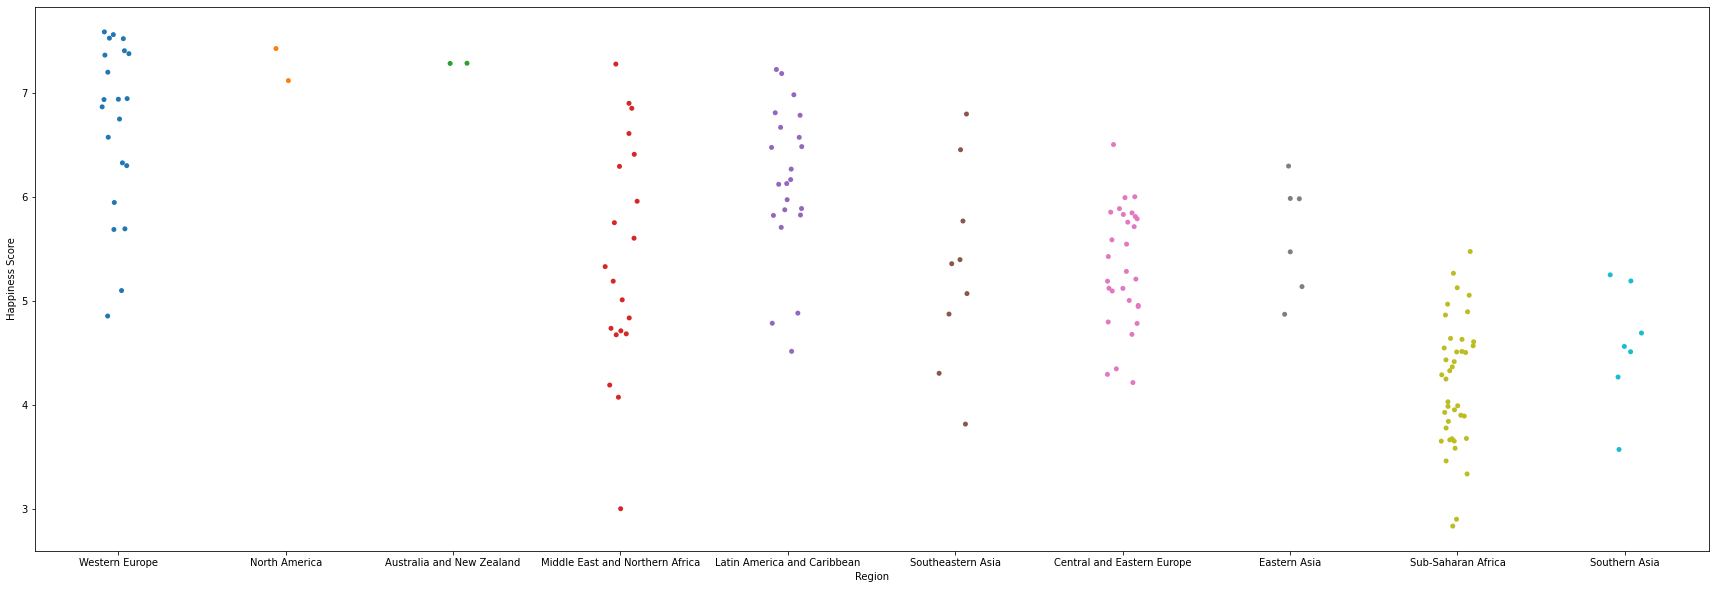

In [49]:
plt.figure(figsize=[30,10])
sns.stripplot(x = 'Region', y= 'Happiness Score',data=df)
plt.show()

In [ ]:
# From above graph it is clear that most of Wertern European countries, Norht American and Australia & New zealand has better happiness score (Most of data points are above score of 7).
# For Middle east & Northern africa, Latin america & carribean region, Southeast asian and central and eastern & eastern europe happines score ranges between 5 to 6.7.
# Where as for sub-saharan africa and Southern Asia is below 3 to 4.5.

# Step 4. Creation of train and test data sets using optimum parameters

In [99]:
# Splitting Happiness Score from rest of dataset
Y = df['Happiness Score']
X = df.drop(columns=['Happiness Score'])

In [100]:
X

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [101]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
5      7.406
6      7.378
7      7.364
8      7.286
9      7.284
10     7.278
11     7.226
12     7.200
13     7.187
14     7.119
15     6.983
16     6.946
17     6.940
18     6.937
19     6.901
20     6.867
21     6.853
22     6.810
23     6.798
24     6.786
25     6.750
26     6.670
27     6.611
28     6.575
29     6.574
30     6.505
31     6.485
32     6.477
33     6.455
34     6.411
35     6.329
36     6.302
37     6.298
38     6.295
39     6.269
40     6.168
41     6.130
42     6.123
43     6.003
44     5.995
45     5.987
46     5.984
47     5.975
48     5.960
49     5.948
50     5.890
51     5.889
52     5.878
53     5.855
54     5.848
55     5.833
56     5.828
57     5.824
58     5.813
59     5.791
60     5.770
61     5.759
62     5.754
63     5.716
64     5.709
65     5.695
66     5.689
67     5.605
68     5.589
69     5.548
70     5.477
71     5.474
72     5.429
73     5.399
74     5.360
75     5.332
76     5.286

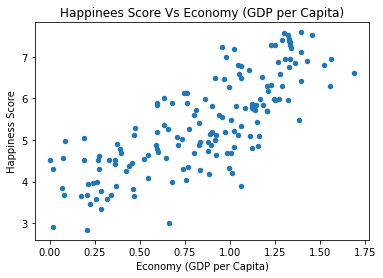

In [102]:
df.plot.scatter(x='Economy (GDP per Capita)', y = 'Happiness Score')
plt.title('Happinees Score Vs Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

In [ ]:
# From above graph it is clear that for Economy (GDP per Capita) in range of 1.00 to 1.50 - Happiness score is more. It is progressive graph means as size of economy is increasing happiness score is also increasing. 

In [104]:
X

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [106]:
X = X.drop(columns = ['Country','Region','Happiness Rank']) # dropping Country, Region and Happiness Ranking columns

In [107]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


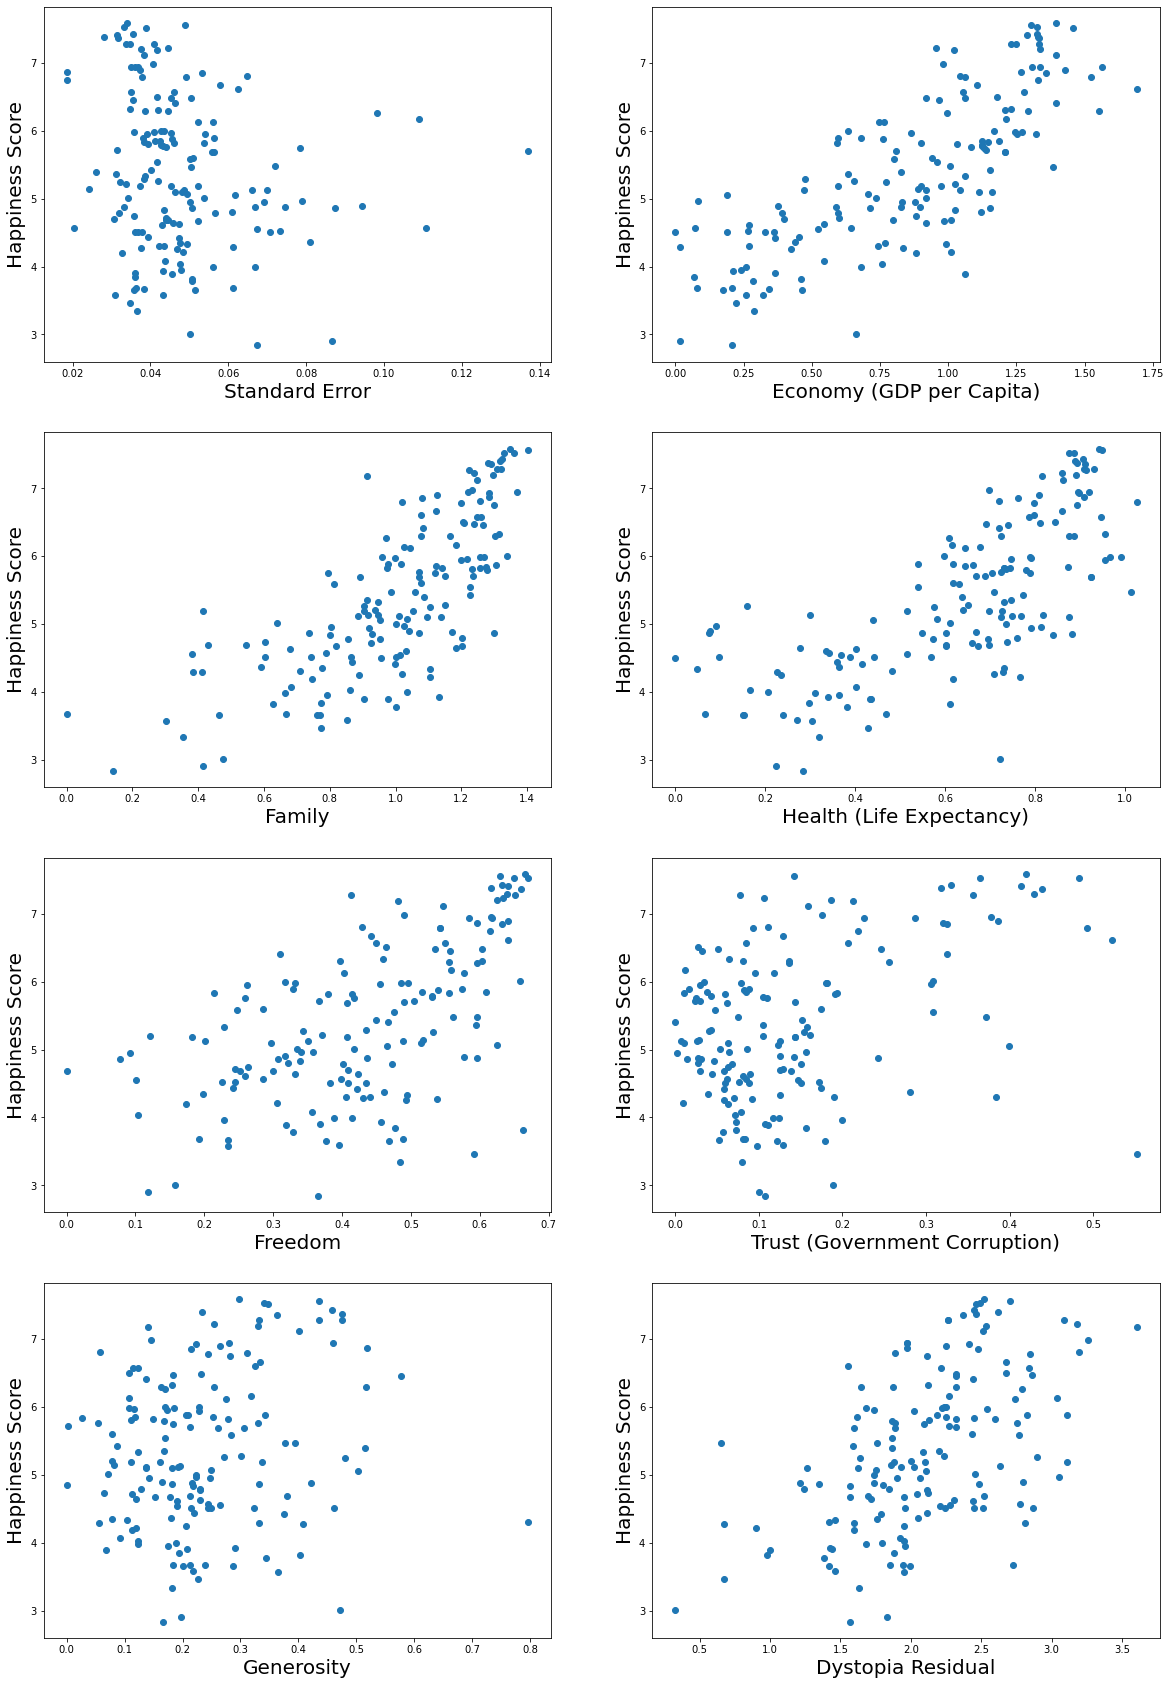

In [108]:
# Visualizing relationship

plt.figure(figsize=(20,30),facecolor = 'White')
plotnumber = 1

for column in X:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.show()    

In [ ]:
#from above graphs it is clear that there is linear relationship between Happiness score and Economy (GDP per Capita),Family, Health (Life expentancy), Freedom.

In [112]:
# Data Scaling
#StandardScaler = (X-mean)/std

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled      

array([[-0.80592569,  1.36962124,  1.32028142, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 0.05588945,  1.13522625,  1.51445776, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.8544869 ,  1.19286069,  1.36105403, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 0.13253425, -0.45524543, -1.90108634, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 2.26396166, -2.06756644, -2.1184666 , ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.13418227, -1.58633379, -3.13472485, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [114]:
# Split data into train and test. Model will be built on training data and tested on test data

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)
y_train

54     5.848
18     6.937
95     4.949
149    3.656
4      7.427
115    4.571
145    3.781
129    4.297
110    4.681
14     7.119
78     5.253
157    2.839
151    3.587
134    4.194
44     5.995
153    3.465
49     5.948
83     5.140
15     6.983
36     6.302
71     5.474
114    4.610
64     5.709
106    4.739
109    4.686
85     5.124
150    3.655
11     7.226
98     4.876
6      7.378
37     6.298
13     7.187
40     6.168
133    4.218
32     6.477
77     5.268
27     6.611
20     6.867
139    3.956
101    4.857
41     6.130
30     6.505
16     6.946
84     5.129
57     5.824
154    3.340
116    4.565
152    3.575
74     5.360
104    4.788
8      7.286
28     6.575
48     5.960
97     4.885
22     6.810
25     6.750
17     6.940
68     5.589
58     5.813
120    4.514
121    4.512
90     5.057
39     6.269
135    4.077
35     6.329
21     6.853
118    4.518
144    3.819
23     6.798
46     5.984
117    4.550
82     5.192
24     6.786
62     5.754
65     5.695
112    4.642
125    4.369

# Step 5. Model training using ML algorithm

# Linear Regression

In [116]:
# Model instantiating and training

regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [118]:
# To find Intercept
print(regression.intercept_)

# To find coefficients
print(regression.coef_)

5.375722536713798
[-1.42846900e-06  4.01871571e-01  2.71478990e-01  2.46297830e-01
  1.50160002e-01  1.19656113e-01  1.26302471e-01  5.51793971e-01]


In [128]:
# Adjusted R2 Score 

regression.score(x_train,y_train)

0.9999999477616426

In [129]:
regression.score(x_test,y_test)

0.9999999092232216

In [120]:
y_pred = regression.predict(x_test)
y_pred

array([7.58686659, 3.98879415, 5.42854298, 4.87423088, 4.6940078 ,
       5.39871793, 3.68090902, 4.50710966, 5.82826947, 3.00644025,
       5.71579371, 6.122737  , 4.03297248, 4.78643557, 6.66966664,
       3.84498056, 3.67780122, 5.09757049, 6.90131271, 6.00267871,
       4.83926486, 7.19978201, 5.54811135, 4.43556859, 5.33248929,
       5.19227923, 5.01307573, 5.75858002, 5.77040102, 6.48508392,
       5.00704727, 3.90375552, 4.97104195, 5.47703407, 4.95938458,
       5.8896775 , 5.79055492, 5.12313034, 5.83260168, 4.89745915])

In [121]:
data = pd.DataFrame({'Acutal data':y_test,'Predicted data':y_pred})
data

,Acutal data,Predicted data
0,7.587,7.586867
138,3.989,3.988794
72,5.429,5.428543
99,4.874,4.874231
108,4.694,4.694008
73,5.399,5.398718
146,3.681,3.680909
122,4.507,4.507110
56,5.828,5.828269
155,3.006,3.006440


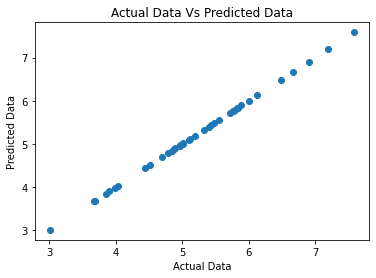

In [122]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data Vs Predicted Data')
plt.show()

In [125]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean squared error :',mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 0.00025347739223583463
Mean squared error : 8.735152799615322e-08
Root mean squared error : 0.0002955529191128946


In [135]:
#Lasso Regularization 
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [136]:
alpha = lasscv.alpha_
alpha

8.681091548556982e-05

In [137]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=8.681091548556982e-05)

In [138]:
lasso_reg.score(x_test,y_test)

0.9999998955082712